# Proyek Analisis Data: E-Commerce public Dataset
- **Nama:** Muhamad Risa Ma'arif
- **Email:** risamaarif@gmail.com
- **ID Dicoding:** Muhamad Risa Ma'arif

## Menentukan Pertanyaan Bisnis

**Pertanyaan 1:** Bagaimana distribusi kontribusi pendapatan antar kategori produk, dan kategori mana yang mendominasi total revenue pada periode transaksi tahun 2017–2018?

**Pertanyaan 2:** Bagaimana hubungan antara lama pengiriman dengan rating pelanggan, dan sejauh mana durasi pengiriman memengaruhi kepuasan pelanggan selama periode transaksi tahun 2017–2018?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Setting visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Untuk Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [2]:
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/orders_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/products_dataset.csv')
category = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/product_category_name_translation.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/order_reviews_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/geolocation_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/order_payments_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/sellers_dataset.csv')

# Merge data
df = pd.merge(orders, order_items, on='order_id')
df = pd.merge(df, products, on='product_id')
df = pd.merge(df, category, on='product_category_name')
df = pd.merge(df, reviews, on='order_id')
df = pd.merge(df, customers, on='customer_id')
df = pd.merge(df, order_payments, on='order_id')
df = pd.merge(df, sellers, on='seller_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,2,voucher,1,18.59,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,47813,barreiras,BA,1,boleto,1,141.46,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,75265,vianopolis,GO,1,credit_card,3,179.12,14840,guariba,SP


In [3]:
# Load dataset
# Sesuaikan path dengan lokasi file Anda di Google Drive

print("Dataset berhasil dimuat!")
print(f"Jumlah baris: {df.shape[0]:,}")
print(f"Jumlah kolom: {df.shape[1]}")
df.head()

Dataset berhasil dimuat!
Jumlah baris: 115,609
Jumlah kolom: 40


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,2,voucher,1,18.59,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,47813,barreiras,BA,1,boleto,1,141.46,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,75265,vianopolis,GO,1,credit_card,3,179.12,14840,guariba,SP


**Insight:**
- Data berhasil dikumpulkan dari berbagai dataset
- Jumlah Baris : 115, 609
- Jumlah kolom : 40

### Assessing Data

In [4]:
# Melihat informasi umum dataset
print("INFORMASI DATASET")
df.info()

INFORMASI DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   order_item_id                  115609 non-null  int64  
 9   product_id                     115609 non-null  object 
 10  seller_id                      115609 non-null  object 
 11  shipping_limit_date            115609 non-null  object 
 12  price       

In [5]:
# 1. Cek Missing Values
print("1. CEK MISSING VALUES")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing': missing_values.values,
    'Persentase (%)': missing_percentage.values
})
missing_df = missing_df[missing_df['Jumlah Missing'] > 0].sort_values('Jumlah Missing', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ Tidak ada missing values dalam dataset")

1. CEK MISSING VALUES
                        Kolom  Jumlah Missing  Persentase (%)
         review_comment_title          101808       88.062348
       review_comment_message           66703       57.697065
order_delivered_customer_date            2400        2.075963
 order_delivered_carrier_date            1195        1.033657
            order_approved_at              14        0.012110
            product_length_cm               1        0.000865
             product_weight_g               1        0.000865
             product_width_cm               1        0.000865
            product_height_cm               1        0.000865


In [6]:
# 2. Cek Data Duplikat
print("2. CEK DATA DUPLIKAT")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates:,}")
print(f"Persentase duplikat: {(duplicates/len(df)*100):.2f}%")

if duplicates > 0:
    print("\nContoh data duplikat:")
    print(df[df.duplicated(keep=False)].head())

2. CEK DATA DUPLIKAT
Jumlah baris duplikat: 0
Persentase duplikat: 0.00%


In [7]:
# 3. Cek Outlier pada Kolom Numerik
print("3. CEK OUTLIER (Menggunakan IQR Method)")

# Pilih kolom numerik yang relevan untuk dicek outlier
numeric_cols = ['price', 'freight_value', 'payment_value', 'review_score']
outlier_summary = []

for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(df)) * 100

        outlier_summary.append({
            'Kolom': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Jumlah Outlier': outlier_count,
            'Persentase (%)': outlier_pct
        })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

3. CEK OUTLIER (Menggunakan IQR Method)
        Kolom    Q1     Q3    IQR  Lower Bound  Upper Bound  Jumlah Outlier  Persentase (%)
        price 39.90 134.90  95.00     -102.600      277.400            8694        7.520176
freight_value 13.08  21.21   8.13        0.885       33.405           12474       10.789817
payment_value 60.87 189.48 128.61     -132.045      382.395            9329        8.069441
 review_score  4.00   5.00   1.00        2.500        6.500           18566       16.059303


In [8]:
# 4. Cek Invalid Data
print("4. CEK INVALID DATA")

# Cek nilai negatif pada kolom yang seharusnya positif
print("\n4.1. Nilai Negatif pada Kolom Harga/Pembayaran:")
for col in ['price', 'freight_value', 'payment_value']:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        print(f"  - {col}: {negative_count} nilai negatif")

# Cek review_score yang invalid (seharusnya 1-5)
if 'review_score' in df.columns:
    print("\n4.2. Review Score Invalid (di luar range 1-5):")
    invalid_reviews = df[(df['review_score'] < 1) | (df['review_score'] > 5)]
    print(f"  - Jumlah review invalid: {len(invalid_reviews)}")
    if len(invalid_reviews) > 0:
        print(f"  - Nilai unik: {invalid_reviews['review_score'].unique()}")

# Cek tanggal yang tidak logis
print("\n4.3. Cek Logika Tanggal:")
date_cols = ['order_purchase_timestamp', 'order_approved_at',
             'order_delivered_carrier_date', 'order_delivered_customer_date']

# Konversi ke datetime jika belum
for col in date_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Cek tanggal delivered < tanggal purchase (tidak logis)
if all(col in df.columns for col in ['order_purchase_timestamp', 'order_delivered_customer_date']):
    invalid_dates = df[df['order_delivered_customer_date'] < df['order_purchase_timestamp']]
    print(f"  - Tanggal pengiriman sebelum pembelian: {len(invalid_dates)} kasus")

4. CEK INVALID DATA

4.1. Nilai Negatif pada Kolom Harga/Pembayaran:
  - price: 0 nilai negatif
  - freight_value: 0 nilai negatif
  - payment_value: 0 nilai negatif

4.2. Review Score Invalid (di luar range 1-5):
  - Jumlah review invalid: 0

4.3. Cek Logika Tanggal:
  - Tanggal pengiriman sebelum pembelian: 0 kasus


In [9]:
# 5. Rangkuman Assessing Data
print("RANGKUMAN QUALITY ISSUES")
print(f"1. Missing Values    : {missing_df['Jumlah Missing'].sum():,} nilai pada {len(missing_df)} kolom")
print(f"2. Data Duplikat     : {duplicates:,} baris")
print(f"3. Outliers          : Terdeteksi pada kolom numerik (lihat detail di atas)")
print(f"4. Invalid Data      : Cek nilai negatif, review score, dan logika tanggal")

RANGKUMAN QUALITY ISSUES
1. Missing Values    : 172,124 nilai pada 9 kolom
2. Data Duplikat     : 0 baris
3. Outliers          : Terdeteksi pada kolom numerik (lihat detail di atas)
4. Invalid Data      : Cek nilai negatif, review score, dan logika tanggal


**Insight:**
- Missing Values : 172,124 nilai pada 9 kolom
- Data Duplkat : 0 baris
- Outliers :
  - Pada kolom price sebanyak 8.694 = 7,520%
  - Pada kolom freight_value sebanyak 12474 = 10,789%
  - pada kolom payment_value sebanyak 9329 = 8,069%
  - pada kolom review_score sebanyak 18566 = 16,059%
- Invalid Data : 0 Kasus


### Cleaning Data

In [10]:
print("DATA CLEANING")

# Simpan jumlah data awal
initial_rows = len(df)
print(f"Jumlah data awal: {initial_rows:,}")

# 1. Hapus duplikat
df = df.drop_duplicates()
print(f"\n1. Setelah menghapus duplikat: {len(df):,} baris ({initial_rows - len(df):,} dihapus)")

# 2. Handle missing values
# Untuk kolom yang penting, hapus baris dengan missing values
important_cols = ['order_id', 'customer_id', 'product_category_name', 'price', 'payment_value']
before_missing = len(df)
df = df.dropna(subset=[col for col in important_cols if col in df.columns])
print(f"\n2. Setelah menghapus missing values pada kolom penting: {len(df):,} baris ({before_missing - len(df):,} dihapus)")

# 3. Handle outlier (untuk visualisasi, kita tetap simpan outlier tapi bisa di-filter saat analisis)
# Simpan info outlier untuk referensi
print(f"\n3. Outlier tetap disimpan dalam dataset untuk transparansi analisis")

# 4. Filter invalid data
# Hapus nilai negatif pada price dan payment
before_invalid = len(df)
if 'price' in df.columns:
    df = df[df['price'] >= 0]
if 'payment_value' in df.columns:
    df = df[df['payment_value'] >= 0]
if 'review_score' in df.columns:
    df = df[(df['review_score'] >= 1) & (df['review_score'] <= 5)]

print(f"\n4. Setelah menghapus data invalid: {len(df):,} baris ({before_invalid - len(df):,} dihapus)")

# 5. Filter berdasarkan periode waktu (2017-2018)
if 'order_purchase_timestamp' in df.columns:
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    df = df[(df['order_purchase_timestamp'].dt.year >= 2017) &
            (df['order_purchase_timestamp'].dt.year <= 2018)]
    print(f"\n5. Setelah filter periode 2017-2018: {len(df):,} baris")

print(f"\nTotal data yang dihapus: {initial_rows - len(df):,} ({((initial_rows - len(df))/initial_rows*100):.2f}%)")
print(f"Jumlah data akhir: {len(df):,}")

DATA CLEANING
Jumlah data awal: 115,609

1. Setelah menghapus duplikat: 115,609 baris (0 dihapus)

2. Setelah menghapus missing values pada kolom penting: 115,609 baris (0 dihapus)

3. Outlier tetap disimpan dalam dataset untuk transparansi analisis

4. Setelah menghapus data invalid: 115,609 baris (0 dihapus)

5. Setelah filter periode 2017-2018: 115,228 baris

Total data yang dihapus: 381 (0.33%)
Jumlah data akhir: 115,228


**Insight:**
- Jumlah data awal 115,609 baris dan setelah filter periode 2017-2018 data tersisa 115,228 baris

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [11]:
# Statistik deskriptif untuk semua kolom
print("DESCRIPTIVE STATISTICS - SEMUA KOLOM")
df.describe(include='all').T

DESCRIPTIVE STATISTICS - SEMUA KOLOM


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
order_id,115228,96212,895ab968e7bb0d5659d16cd74cd1650c,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,115228,96212,270c23a11d024a44c896d1894b261a83,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,115228,6,delivered,112881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_purchase_timestamp,115228,NaN,NaN,NaN,2018-01-01 16:10:50.827255552,2017-01-05 11:56:06,2017-09-13 13:20:19.249999872,2018-01-19 19:26:04,2018-05-04 21:22:05.750000128,2018-09-03 09:06:57,NaN
order_approved_at,115214,NaN,NaN,NaN,2018-01-02 03:34:21.100673792,2017-01-05 12:10:17,2017-09-13 22:05:45.500000,2018-01-20 09:26:13.500000,2018-05-05 09:55:23,2018-09-03 17:40:06,NaN
order_delivered_carrier_date,114070,NaN,NaN,NaN,2018-01-05 13:37:24.143140352,2017-01-06 12:43:41,2017-09-18 17:36:07,2018-01-24 17:42:29.500000,2018-05-08 13:58:00,2018-09-11 19:48:28,NaN
order_delivered_customer_date,112874,NaN,NaN,NaN,2018-01-15 00:55:25.590251520,2017-01-11 13:14:05,2017-09-26 18:12:39.249999872,2018-02-02 19:24:36,2018-05-15 21:32:20.249999872,2018-10-17 13:22:46,NaN
order_estimated_delivery_date,115228,420,2017-12-20 00:00:00,649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,115228.0,NaN,NaN,NaN,1.194336,1.0,1.0,1.0,1.0,21.0,0.685746
product_id,115228,32009,aca2eb7d00ea1a7b8ebd4e68314663af,533,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Statistik deskriptif untuk kolom numerik saja
print("DESCRIPTIVE STATISTICS - KOLOM NUMERIK")
numeric_stats = df.describe()
numeric_stats

DESCRIPTIVE STATISTICS - KOLOM NUMERIK


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115228,115214,114070,112874,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115227.000000,115227.000000,115227.000000,115227.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000
mean,2018-01-01 16:10:50.827255552,2018-01-02 03:34:21.100673792,2018-01-05 13:37:24.143140352,2018-01-15 00:55:25.590251520,1.194336,120.581719,20.057626,48.765708,785.657583,2.204672,2113.458616,30.305041,16.630989,23.113012,4.035833,35044.985316,1.093753,2.943286,172.322609,24494.822222
min,2017-01-05 11:56:06,2017-01-05 12:10:17,2017-01-06 12:43:41,2017-01-11 13:14:05,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1003.000000,1.000000,0.000000,0.000000,1001.000000
25%,2017-09-13 13:20:19.249999872,2017-09-13 22:05:45.500000,2017-09-18 17:36:07,2017-09-26 18:12:39.249999872,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,11250.000000,1.000000,1.000000,60.860000,6429.000000
50%,2018-01-19 19:26:04,2018-01-20 09:26:13.500000,2018-01-24 17:42:29.500000,2018-02-02 19:24:36,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000,24240.000000,1.000000,2.000000,108.000000,13660.000000
75%,2018-05-04 21:22:05.750000128,2018-05-05 09:55:23,2018-05-08 13:58:00,2018-05-15 21:32:20.249999872,1.000000,134.900000,21.210000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,58640.000000,1.000000,4.000000,189.370000,28470.000000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,99980.000000,29.000000,24.000000,13664.080000,99730.000000
std,NaN,NaN,NaN,NaN,0.685746,182.666979,15.841623,10.029431,652.345084,1.717125,3780.956127,16.209571,13.472866,11.759034,1.384335,29836.851399,0.730426,2.778960,266.046645,27627.335178


In [13]:
# Informasi tambahan statistik
print("ADDITIONAL STATISTICS")

numeric_cols = df.select_dtypes(include=[np.number]).columns
additional_stats = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurtosis(),
    'Variance': df[numeric_cols].var()
})
print(additional_stats)

ADDITIONAL STATISTICS
                             Skewness    Kurtosis      Variance
order_item_id                7.209389   93.783281  4.702476e-01
price                        7.627434  108.180618  3.336723e+04
freight_value                5.559663   58.268710  2.509570e+02
product_name_lenght         -0.907213    0.152132  1.005895e+02
product_description_lenght   2.012856    4.934024  4.255541e+05
product_photos_qty           1.910654    4.839197  2.948519e+00
product_weight_g             3.578765   16.020711  1.429563e+07
product_length_cm            1.742154    3.661993  2.627502e+02
product_height_cm            2.244830    7.298312  1.815181e+02
product_width_cm             1.706193    4.544970  1.382749e+02
review_score                -1.277465    0.223004  1.916383e+00
customer_zip_code_prefix     0.785159   -0.782522  8.902377e+08
payment_sequential          16.006875  350.422847  5.335224e-01
payment_installments         1.621292    2.532361  7.722620e+00
payment_value     

### Distribusi Data

DISTRIBUSI DATA NUMERIK


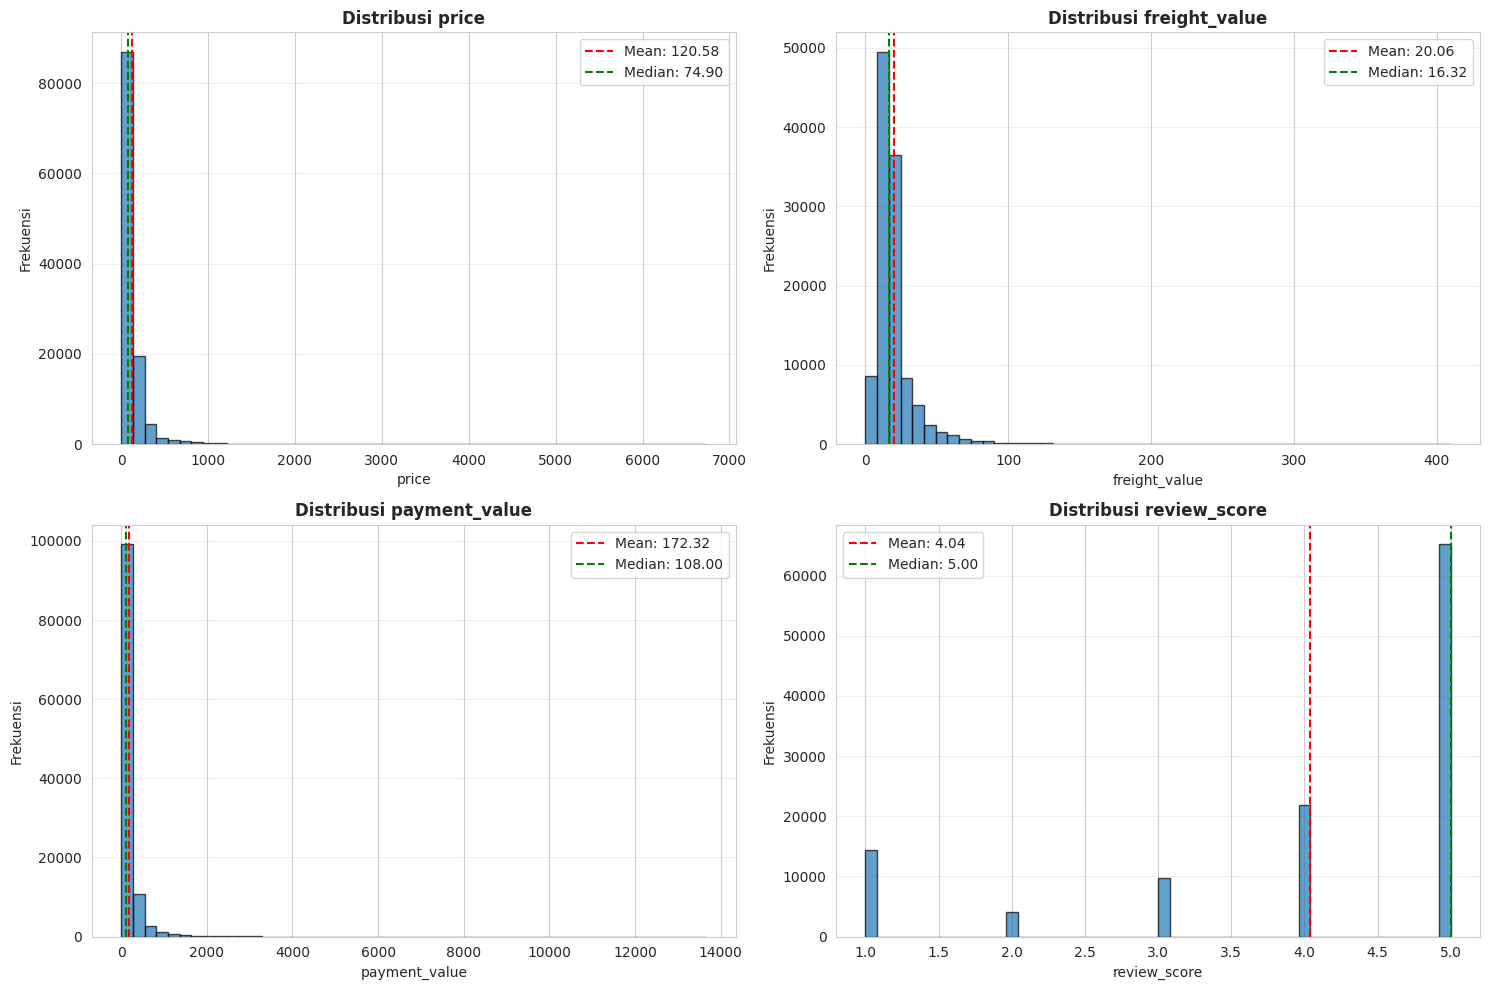


INTERPRETASI:

price:
  - Mean: 120.58
  - Median: 74.90
  - Skewness: 7.63 (Positively skewed - distribusi miring ke kanan)

freight_value:
  - Mean: 20.06
  - Median: 16.32
  - Skewness: 5.56 (Positively skewed - distribusi miring ke kanan)

payment_value:
  - Mean: 172.32
  - Median: 108.00
  - Skewness: 14.32 (Positively skewed - distribusi miring ke kanan)

review_score:
  - Mean: 4.04
  - Median: 5.00
  - Skewness: -1.28 (Negatively skewed - distribusi miring ke kiri)


In [14]:
# Histogram untuk kolom numerik utama
print("DISTRIBUSI DATA NUMERIK")

# Pilih kolom numerik yang relevan
cols_to_plot = ['price', 'freight_value', 'payment_value', 'review_score']
cols_available = [col for col in cols_to_plot if col in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(cols_available):
    if idx < 4:
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frekuensi')
        axes[idx].grid(axis='y', alpha=0.3)

        # Tambahkan garis mean dan median
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
        axes[idx].legend()

plt.tight_layout()
plt.show()

# Interpretasi
print("\nINTERPRETASI:")
for col in cols_available:
    skewness = df[col].skew()
    print(f"\n{col}:")
    print(f"  - Mean: {df[col].mean():.2f}")
    print(f"  - Median: {df[col].median():.2f}")
    print(f"  - Skewness: {skewness:.2f}", end="")
    if skewness > 1:
        print(" (Positively skewed - distribusi miring ke kanan)")
    elif skewness < -1:
        print(" (Negatively skewed - distribusi miring ke kiri)")
    else:
        print(" (Relatively symmetric)")

### Correlation Analysis

CORRELATION ANALYSIS


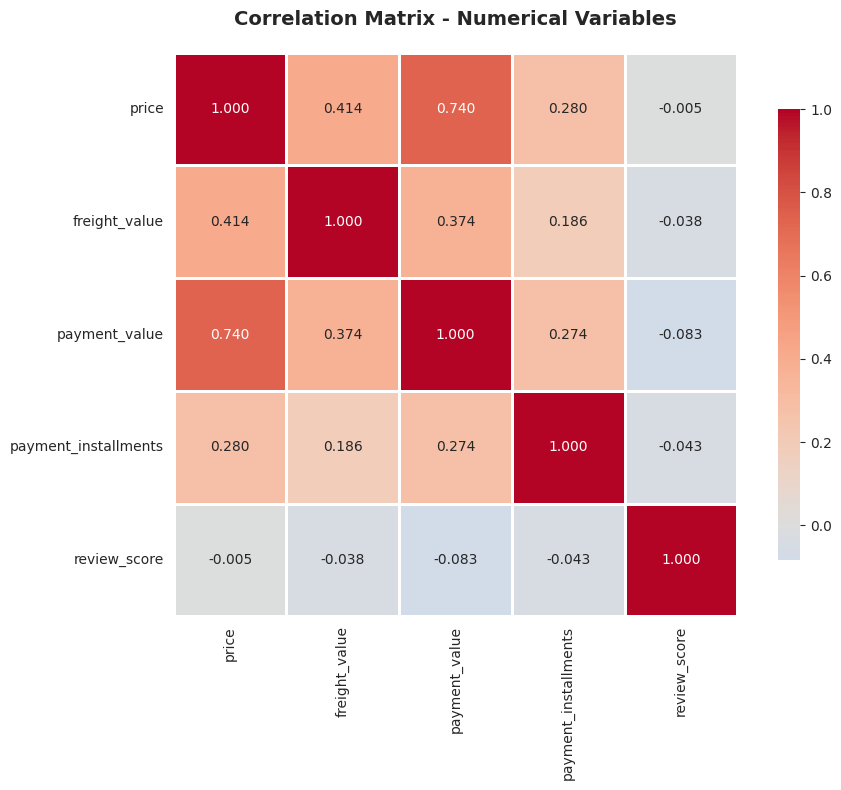


Correlation Matrix:
                         price  freight_value  payment_value  \
price                 1.000000       0.414426       0.740035   
freight_value         0.414426       1.000000       0.373743   
payment_value         0.740035       0.373743       1.000000   
payment_installments  0.279653       0.186221       0.274315   
review_score         -0.005149      -0.038387      -0.083039   

                      payment_installments  review_score  
price                             0.279653     -0.005149  
freight_value                     0.186221     -0.038387  
payment_value                     0.274315     -0.083039  
payment_installments              1.000000     -0.042553  
review_score                     -0.042553      1.000000  
STRONG CORRELATIONS (|r| > 0.7)
Variable 1    Variable 2  Correlation
     price payment_value     0.740035


In [15]:
# Correlation matrix
print("CORRELATION ANALYSIS")

# Pilih kolom numerik yang relevan untuk analisis korelasi
corr_cols = ['price', 'freight_value', 'payment_value', 'payment_installments', 'review_score']
corr_cols_available = [col for col in corr_cols if col in df.columns]

# Hitung correlation matrix
correlation_matrix = df[corr_cols_available].corr()

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Identifikasi korelasi yang kuat (> 0.7 atau < -0.7)
print("STRONG CORRELATIONS (|r| > 0.7)")

strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_corr.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr)
    print(strong_corr_df.to_string(index=False))
else:
    print("Tidak ada korelasi yang sangat kuat (|r| > 0.7) antar variabel")

In [16]:
# Covariance matrix
print("COVARIANCE MATRIX")

covariance_matrix = df[corr_cols_available].cov()
print(covariance_matrix)

COVARIANCE MATRIX
                             price  freight_value  payment_value  \
price                 33367.225267    1199.241778   35964.168077   
freight_value          1199.241778     250.957029    1575.179308   
payment_value         35964.168077    1575.179308   70780.817050   
payment_installments    141.958730       8.198067     202.810082   
review_score             -1.302104      -0.841832     -30.582988   

                      payment_installments  review_score  
price                           141.958730     -1.302104  
freight_value                     8.198067     -0.841832  
payment_value                   202.810082    -30.582988  
payment_installments              7.722620     -0.163701  
review_score                     -0.163701      1.916383  


### Analisis Kategori Produk

ANALISIS KATEGORI PRODUK

Jumlah kategori produk unik: 71

Top 10 Kategori Berdasarkan Jumlah Transaksi:
product_category_name
cama_mesa_banho           11839
beleza_saude               9896
esporte_lazer              8923
moveis_decoracao           8663
informatica_acessorios     8081
utilidades_domesticas      7319
relogios_presentes         6156
telefonia                  4681
ferramentas_jardim         4553
automotivo                 4344
Name: count, dtype: int64


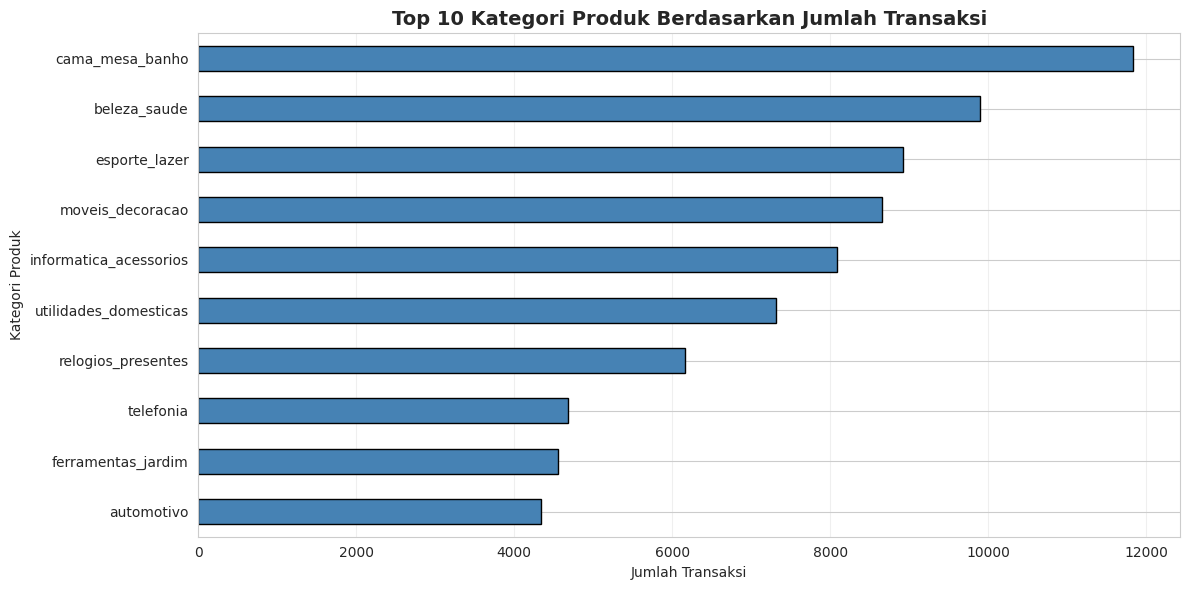

In [17]:
# Eksplorasi kategori produk
print("ANALISIS KATEGORI PRODUK")

if 'product_category_name' in df.columns:
    # Jumlah kategori unik
    n_categories = df['product_category_name'].nunique()
    print(f"\nJumlah kategori produk unik: {n_categories}")

    # Top 10 kategori berdasarkan jumlah transaksi
    print("\nTop 10 Kategori Berdasarkan Jumlah Transaksi:")
    top_categories_count = df['product_category_name'].value_counts().head(10)
    print(top_categories_count)

    # Visualisasi
    plt.figure(figsize=(12, 6))
    top_categories_count.plot(kind='barh', color='steelblue', edgecolor='black')
    plt.title('Top 10 Kategori Produk Berdasarkan Jumlah Transaksi', fontsize=14, fontweight='bold')
    plt.xlabel('Jumlah Transaksi')
    plt.ylabel('Kategori Produk')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

### Analisis Temporal

ANALISIS TEMPORAL (TIME SERIES)

Jumlah Transaksi per Bulan:
year_month
2017-01     998
2017-02    1999
2017-03    3109
2017-04    2760
2017-05    4300
2017-06    3728
2017-07    4773
2017-08    5083
2017-09    5014
2017-10    5491
2017-11    8881
2017-12    6371
2018-01    8304
2018-02    7817
2018-03    8380
2018-04    8123
2018-05    8127
2018-06    7331
2018-07    7242
2018-08    7396
2018-09       1
Freq: M, dtype: int64


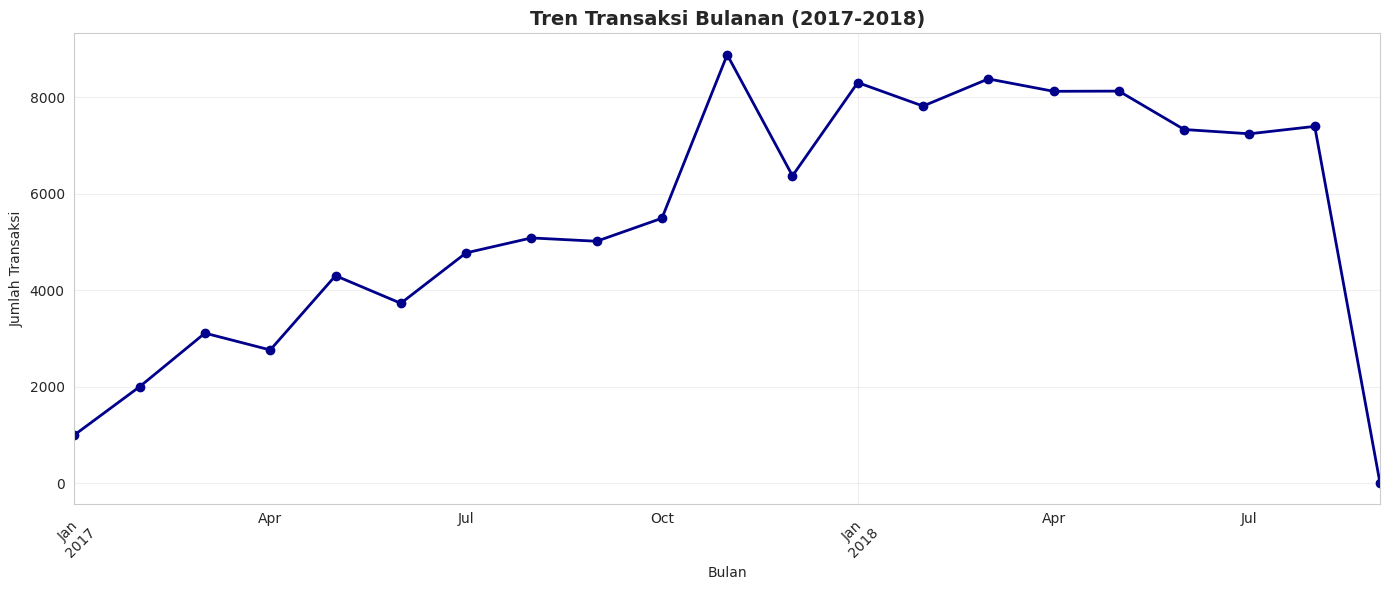

In [18]:
# Analisis tren waktu
print("ANALISIS TEMPORAL (TIME SERIES)")

if 'order_purchase_timestamp' in df.columns:
    # Transaksi per bulan
    df['year_month'] = df['order_purchase_timestamp'].dt.to_period('M')
    monthly_orders = df.groupby('year_month').size()

    print("\nJumlah Transaksi per Bulan:")
    print(monthly_orders)

    # Visualisasi
    plt.figure(figsize=(14, 6))
    monthly_orders.plot(kind='line', marker='o', linewidth=2, markersize=6, color='darkblue')
    plt.title('Tren Transaksi Bulanan (2017-2018)', fontsize=14, fontweight='bold')
    plt.xlabel('Bulan')
    plt.ylabel('Jumlah Transaksi')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Insight:**
- Descriptive Statistic :
  - Mayoritas transaksi bernilai kecil, namun ada segelintir transaksi sangat besar.

- Distribusi Data :
  - Mayoritas transaksi bernilai kecil–menengah

- Corelation analysis :
  - Kepuasan pelanggan tidak dipengaruhi harga atau ongkir
  - Produk mahal tidak otomatis review lebih buruk
  - Ongkir mahal tidak selalu menurunkan rating

- Analisis kategori produk :
  - Analisis kategori produk menunjukkan bahwa transaksi e-commerce didominasi oleh kategori kebutuhan rumah tangga dan gaya hidup, seperti cama_mesa_banho dan beleza_saude.


- Analisis Temporal(time series) :
  - Analisis temporal menunjukkan adanya pertumbuhan transaksi yang signifikan sepanjang tahun 2017 dengan puncak pada November, yang mengindikasikan pengaruh kuat faktor musiman dan promosi akhir tahun. Memasuki tahun 2018, jumlah transaksi cenderung stabil pada level tinggi dengan sedikit penurunan di pertengahan tahun, menandakan fase awal maturitas platform.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi kontribusi pendapatan antar kategori produk, dan kategori mana yang mendominasi total revenue pada periode transaksi tahun 2017–2018?

In [19]:
# Analisis Revenue per Kategori Produk
print("ANALISIS REVENUE PER KATEGORI PRODUK (2017-2018)")

if 'product_category_name' in df.columns and 'payment_value' in df.columns:
    # Hitung total revenue per kategori
    revenue_by_category = df.groupby('product_category_name')['payment_value'].agg([
        ('total_revenue', 'sum'),
        ('avg_revenue', 'mean'),
        ('num_transactions', 'count')
    ]).sort_values('total_revenue', ascending=False)

    # Hitung persentase kontribusi
    total_revenue_all = revenue_by_category['total_revenue'].sum()
    revenue_by_category['percentage'] = (revenue_by_category['total_revenue'] / total_revenue_all * 100)
    revenue_by_category['cumulative_percentage'] = revenue_by_category['percentage'].cumsum()

    # Tampilkan Top 15 kategori
    print("\nTop 15 Kategori Berdasarkan Total Revenue:")
    print(revenue_by_category.head(15).to_string())

    print(f"\n{'='*80}")
    print(f"Total Revenue Keseluruhan: R$ {total_revenue_all:,.2f}")
    print(f"Kontribusi Top 5 Kategori: {revenue_by_category.head(5)['percentage'].sum():.2f}%")
    print(f"Kontribusi Top 10 Kategori: {revenue_by_category.head(10)['percentage'].sum():.2f}%")

ANALISIS REVENUE PER KATEGORI PRODUK (2017-2018)

Top 15 Kategori Berdasarkan Total Revenue:
                        total_revenue  avg_revenue  num_transactions  percentage  cumulative_percentage
product_category_name                                                                                  
cama_mesa_banho            1723173.96   145.550634             11839    8.678184               8.678184
beleza_saude               1640370.67   165.760981              9896    8.261173              16.939357
informatica_acessorios     1590214.96   196.784428              8081    8.008581              24.947937
relogios_presentes         1417214.13   230.216720              6156    7.137320              32.085258
moveis_decoracao           1415684.55   163.417355              8663    7.129617              39.214875
esporte_lazer              1386654.76   155.402304              8923    6.983418              46.198293
utilidades_domesticas      1088972.63   148.787079              7319    5.4

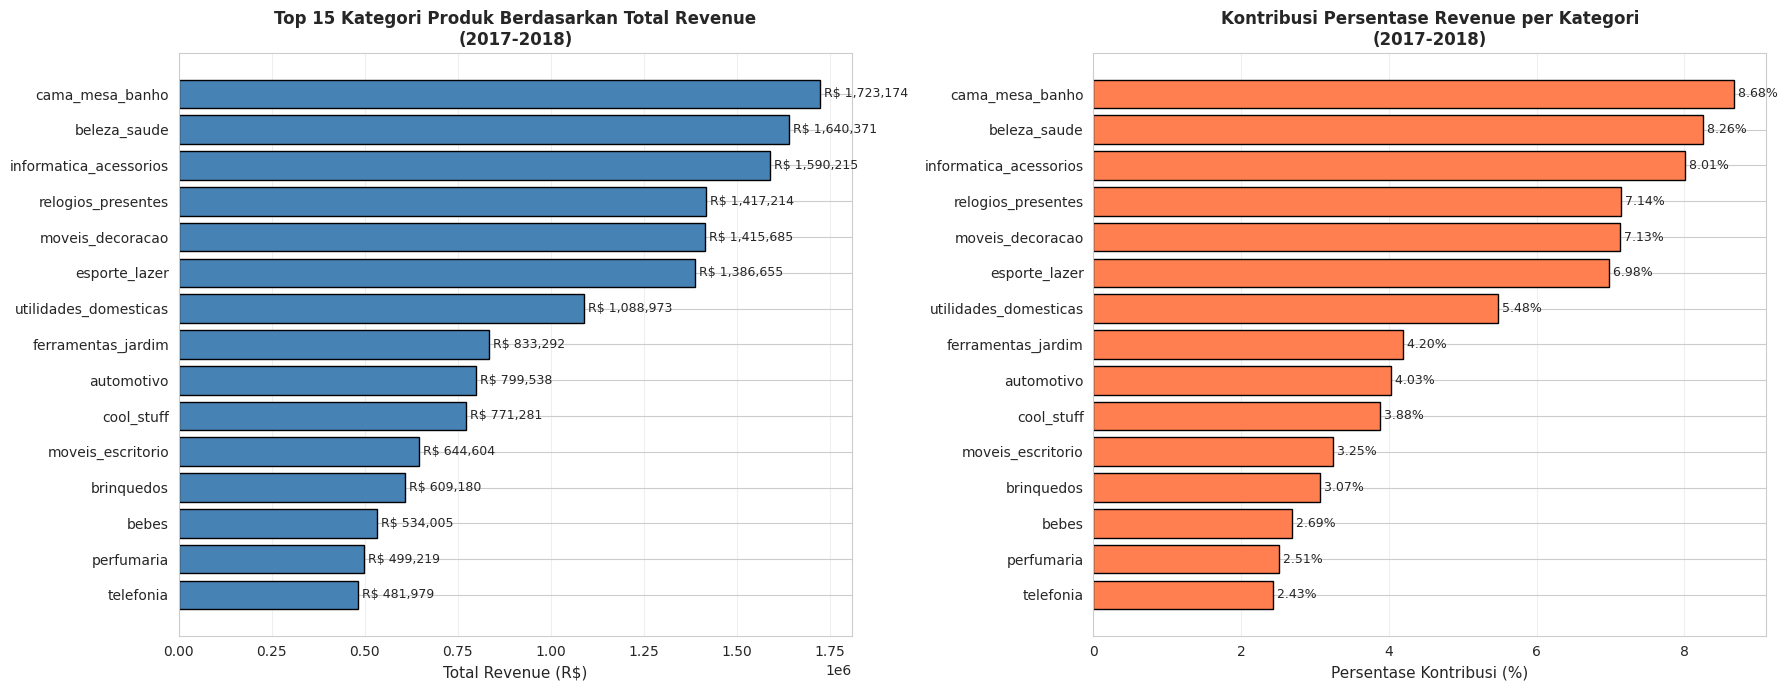

In [20]:
# Visualisasi 1: Bar Chart Top 15 Kategori
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Chart 1: Total Revenue
top_15 = revenue_by_category.head(15)
axes[0].barh(range(len(top_15)), top_15['total_revenue'], color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15.index)
axes[0].invert_yaxis()
axes[0].set_xlabel('Total Revenue (R$)', fontsize=11)
axes[0].set_title('Top 15 Kategori Produk Berdasarkan Total Revenue\n(2017-2018)',
                   fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Tambahkan value labels
for i, v in enumerate(top_15['total_revenue']):
    axes[0].text(v, i, f' R$ {v:,.0f}', va='center', fontsize=9)

# Chart 2: Percentage Contribution
axes[1].barh(range(len(top_15)), top_15['percentage'], color='coral', edgecolor='black')
axes[1].set_yticks(range(len(top_15)))
axes[1].set_yticklabels(top_15.index)
axes[1].invert_yaxis()
axes[1].set_xlabel('Persentase Kontribusi (%)', fontsize=11)
axes[1].set_title('Kontribusi Persentase Revenue per Kategori\n(2017-2018)',
                   fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Tambahkan value labels
for i, v in enumerate(top_15['percentage']):
    axes[1].text(v, i, f' {v:.2f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

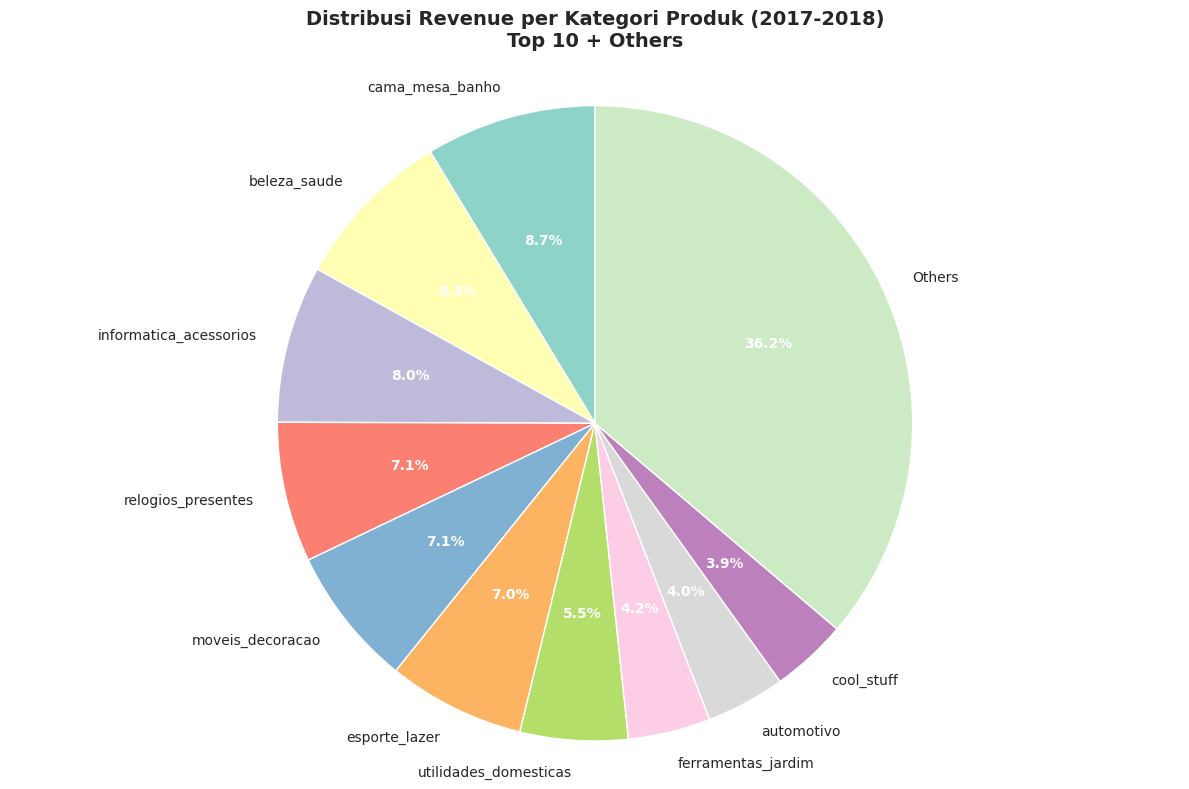

In [21]:
# Visualisasi 2: Pie Chart untuk Top 10 + Others
plt.figure(figsize=(12, 8))

# Ambil top 10 dan sisanya sebagai 'Others'
top_10_revenue = revenue_by_category.head(10)['total_revenue']
others_revenue = revenue_by_category.iloc[10:]['total_revenue'].sum()

# Gabungkan data
pie_data = pd.concat([top_10_revenue, pd.Series({'Others': others_revenue})])
colors = plt.cm.Set3(range(len(pie_data)))

# Buat pie chart
wedges, texts, autotexts = plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%',
                                     startangle=90, colors=colors, textprops={'fontsize': 10})

# Perbaiki tampilan persentase
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribusi Revenue per Kategori Produk (2017-2018)\nTop 10 + Others',
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

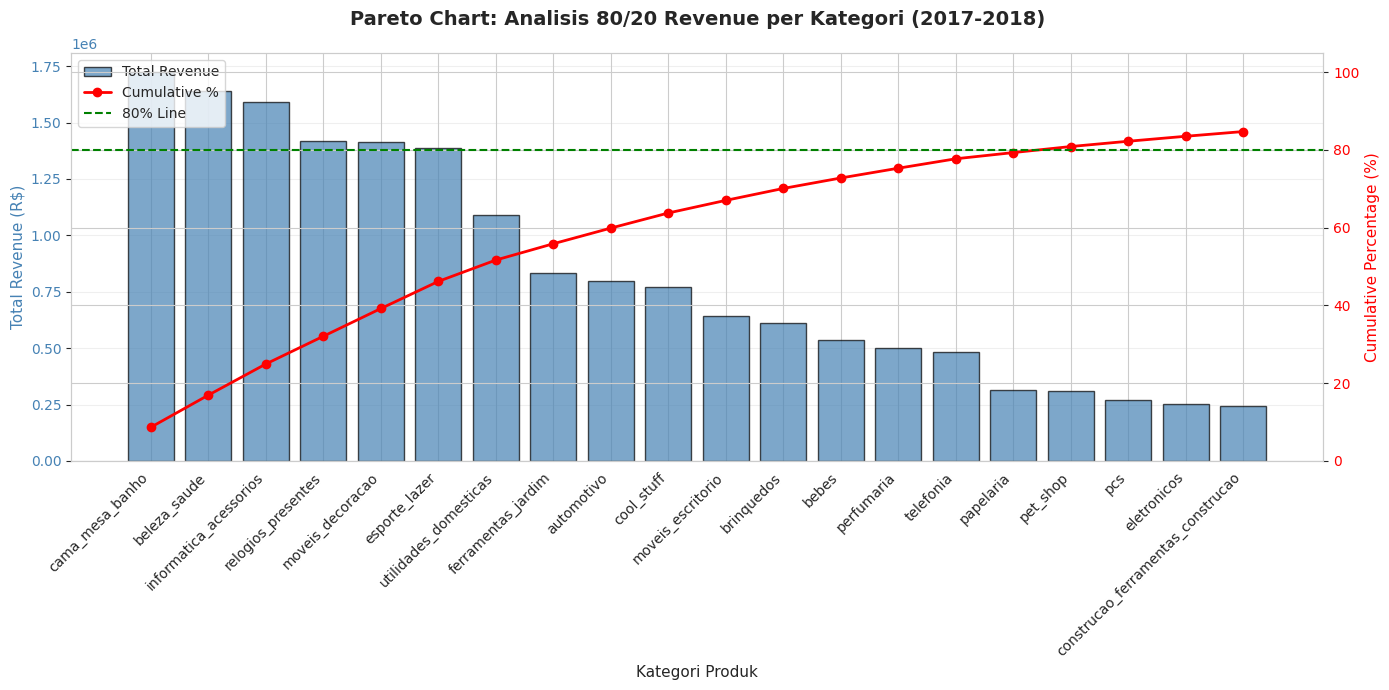


Jumlah kategori yang berkontribusi 80% revenue: 16 dari 71 kategori
Persentase kategori: 22.54%


In [22]:
# Visualisasi 3: Pareto Chart (80/20 Analysis)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart untuk revenue
top_20 = revenue_by_category.head(20)
ax1.bar(range(len(top_20)), top_20['total_revenue'], color='steelblue',
        alpha=0.7, edgecolor='black', label='Total Revenue')
ax1.set_xlabel('Kategori Produk', fontsize=11)
ax1.set_ylabel('Total Revenue (R$)', fontsize=11, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(range(len(top_20)))
ax1.set_xticklabels(top_20.index, rotation=45, ha='right')

# Line chart untuk cumulative percentage
ax2 = ax1.twinx()
ax2.plot(range(len(top_20)), top_20['cumulative_percentage'], color='red',
         marker='o', linewidth=2, markersize=6, label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=11, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0, 105])

# Tambahkan garis 80%
ax2.axhline(y=80, color='green', linestyle='--', linewidth=1.5, label='80% Line')

# Judul dan grid
plt.title('Pareto Chart: Analisis 80/20 Revenue per Kategori (2017-2018)',
          fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3)

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Cari kategori yang mencapai 80% revenue
categories_80_pct = revenue_by_category[revenue_by_category['cumulative_percentage'] <= 80]
print(f"\nJumlah kategori yang berkontribusi 80% revenue: {len(categories_80_pct)} dari {len(revenue_by_category)} kategori")
print(f"Persentase kategori: {(len(categories_80_pct)/len(revenue_by_category)*100):.2f}%")

### Pertanyaan 2: Bagaimana hubungan antara lama pengiriman dengan rating pelanggan, dan sejauh mana durasi pengiriman memengaruhi kepuasan pelanggan selama periode transaksi tahun 2017–2018?

In [23]:
# Hitung lama pengiriman
print("ANALISIS HUBUNGAN LAMA PENGIRIMAN VS RATING PELANGGAN (2017-2018)")

if all(col in df.columns for col in ['order_purchase_timestamp', 'order_delivered_customer_date', 'review_score']):
    # Hitung durasi pengiriman dalam hari
    df['delivery_duration'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

    # Filter hanya data yang valid (delivery duration > 0 dan reasonable)
    df_delivery = df[(df['delivery_duration'] > 0) & (df['delivery_duration'] <= 100)].copy()

    print(f"\nJumlah data valid untuk analisis: {len(df_delivery):,}")
    print(f"\nStatistik Lama Pengiriman (hari):")
    print(df_delivery['delivery_duration'].describe())

    print(f"\nStatistik Rating Pelanggan:")
    print(df_delivery['review_score'].describe())

ANALISIS HUBUNGAN LAMA PENGIRIMAN VS RATING PELANGGAN (2017-2018)

Jumlah data valid untuk analisis: 112,790

Statistik Lama Pengiriman (hari):
count    112790.000000
mean         11.878987
std           8.731621
min           1.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         100.000000
Name: delivery_duration, dtype: float64

Statistik Rating Pelanggan:
count    112790.000000
mean          4.083873
std           1.344725
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64


In [24]:
# Analisis rating berdasarkan kategori lama pengiriman
print("ANALISIS RATING BERDASARKAN KATEGORI LAMA PENGIRIMAN")

# Kategorisasi lama pengiriman
df_delivery['delivery_category'] = pd.cut(df_delivery['delivery_duration'],
                                           bins=[0, 7, 14, 21, 30, 100],
                                           labels=['≤7 hari', '8-14 hari', '15-21 hari', '22-30 hari', '>30 hari'])

# Statistik per kategori
delivery_stats = df_delivery.groupby('delivery_category').agg({
    'review_score': ['mean', 'median', 'count', 'std'],
    'delivery_duration': ['mean', 'median']
}).round(2)

print("\nStatistik Rating dan Lama Pengiriman per Kategori:")
print(delivery_stats)

ANALISIS RATING BERDASARKAN KATEGORI LAMA PENGIRIMAN

Statistik Rating dan Lama Pengiriman per Kategori:
                  review_score                     delivery_duration       
                          mean median  count   std              mean median
delivery_category                                                          
≤7 hari                   4.33    5.0  39644  1.16              4.81    5.0
8-14 hari                 4.20    5.0  42915  1.24             10.64   10.0
15-21 hari                4.02    5.0  17948  1.33             17.52   17.0
22-30 hari                3.44    4.0   7833  1.58             25.12   25.0
>30 hari                  2.14    1.0   4450  1.52             40.78   38.0


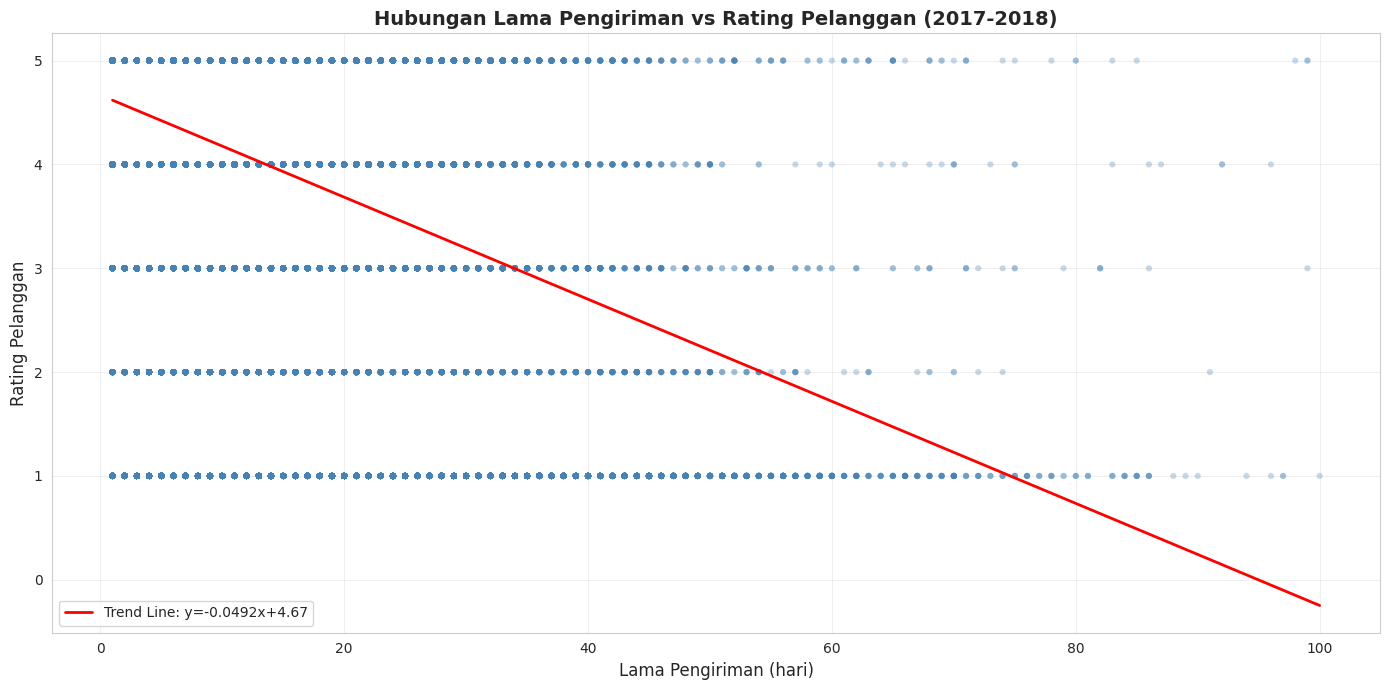


Korelasi antara lama pengiriman dan rating: -0.3192
Interpretasi: Terdapat korelasi negatif yang cukup kuat


In [25]:
# Visualisasi 1: Scatter Plot dengan Trend Line
plt.figure(figsize=(14, 7))

# Scatter plot
plt.scatter(df_delivery['delivery_duration'], df_delivery['review_score'],
           alpha=0.3, s=20, color='steelblue', edgecolor='none')

# Tambahkan trend line (regression line)
z = np.polyfit(df_delivery['delivery_duration'], df_delivery['review_score'], 1)
p = np.poly1d(z)
plt.plot(df_delivery['delivery_duration'].sort_values(),
        p(df_delivery['delivery_duration'].sort_values()),
        "r-", linewidth=2, label=f'Trend Line: y={z[0]:.4f}x+{z[1]:.2f}')

plt.xlabel('Lama Pengiriman (hari)', fontsize=12)
plt.ylabel('Rating Pelanggan', fontsize=12)
plt.title('Hubungan Lama Pengiriman vs Rating Pelanggan (2017-2018)',
         fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Hitung korelasi
correlation = df_delivery['delivery_duration'].corr(df_delivery['review_score'])
print(f"\nKorelasi antara lama pengiriman dan rating: {correlation:.4f}")

if correlation < -0.3:
    print("Interpretasi: Terdapat korelasi negatif yang cukup kuat")
elif correlation < -0.1:
    print("Interpretasi: Terdapat korelasi negatif yang lemah")
else:
    print("Interpretasi: Korelasi sangat lemah atau tidak ada")

<Figure size 1400x700 with 0 Axes>

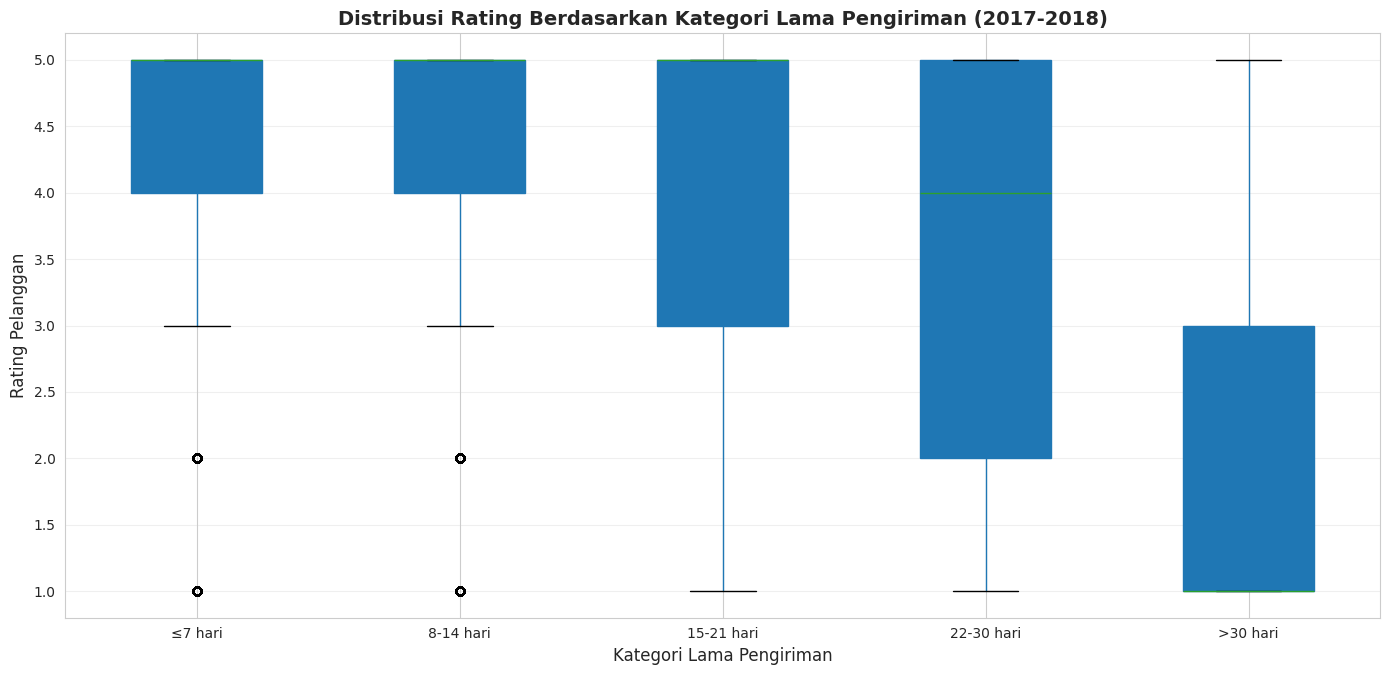

In [26]:
# Visualisasi 2: Box Plot Rating per Kategori Pengiriman
plt.figure(figsize=(14, 7))

# Box plot
df_delivery.boxplot(column='review_score', by='delivery_category',
                    figsize=(14, 7), patch_artist=True)

plt.suptitle('')  # Remove default title
plt.title('Distribusi Rating Berdasarkan Kategori Lama Pengiriman (2017-2018)',
         fontsize=14, fontweight='bold')
plt.xlabel('Kategori Lama Pengiriman', fontsize=12)
plt.ylabel('Rating Pelanggan', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

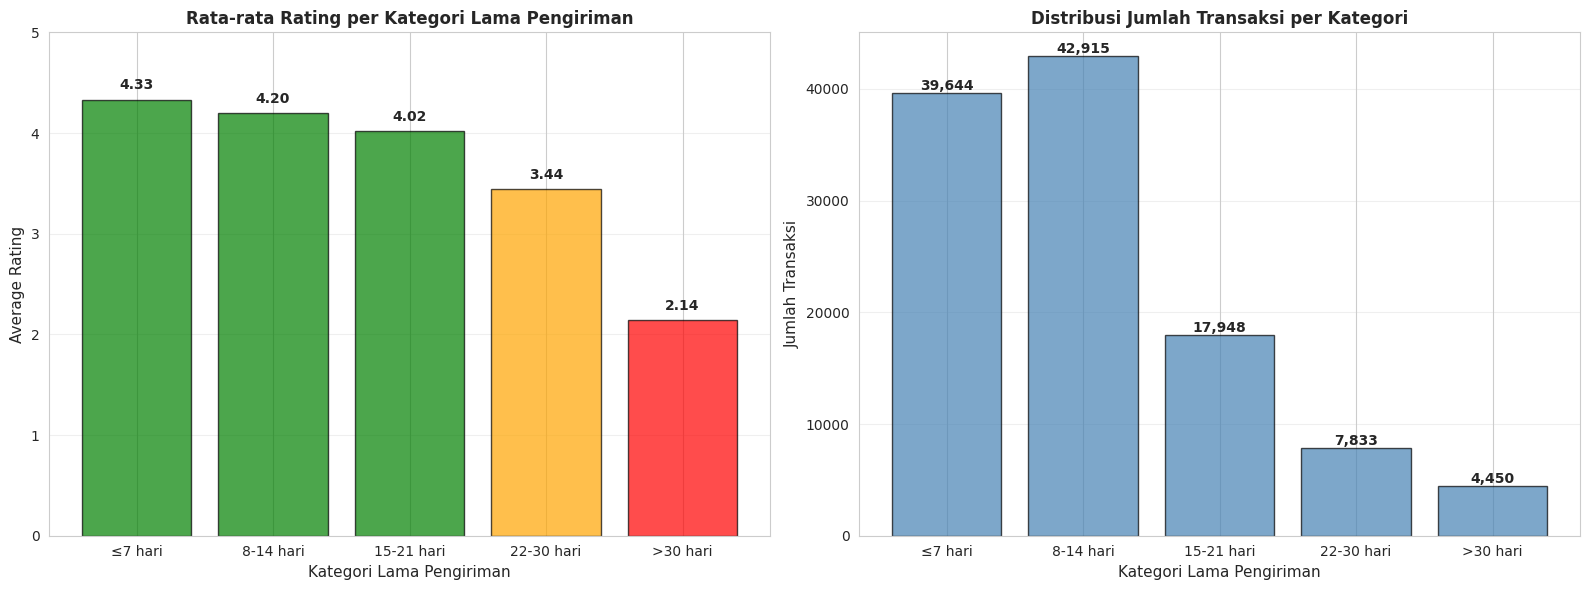

In [27]:
# Visualisasi 3: Bar Chart - Average Rating per Kategori
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Average Rating
avg_rating = df_delivery.groupby('delivery_category')['review_score'].mean().sort_index()
colors_rating = ['green' if x >= 4 else 'orange' if x >= 3 else 'red' for x in avg_rating]

axes[0].bar(range(len(avg_rating)), avg_rating, color=colors_rating,
           edgecolor='black', alpha=0.7)
axes[0].set_xticks(range(len(avg_rating)))
axes[0].set_xticklabels(avg_rating.index, rotation=0)
axes[0].set_ylabel('Average Rating', fontsize=11)
axes[0].set_xlabel('Kategori Lama Pengiriman', fontsize=11)
axes[0].set_title('Rata-rata Rating per Kategori Lama Pengiriman',
                 fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 5])
axes[0].grid(axis='y', alpha=0.3)

# Tambahkan value labels
for i, v in enumerate(avg_rating):
    axes[0].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

# Chart 2: Jumlah Transaksi per Kategori
transaction_count = df_delivery.groupby('delivery_category').size().sort_index()
axes[1].bar(range(len(transaction_count)), transaction_count,
           color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(transaction_count)))
axes[1].set_xticklabels(transaction_count.index, rotation=0)
axes[1].set_ylabel('Jumlah Transaksi', fontsize=11)
axes[1].set_xlabel('Kategori Lama Pengiriman', fontsize=11)
axes[1].set_title('Distribusi Jumlah Transaksi per Kategori',
                 fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Tambahkan value labels
for i, v in enumerate(transaction_count):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

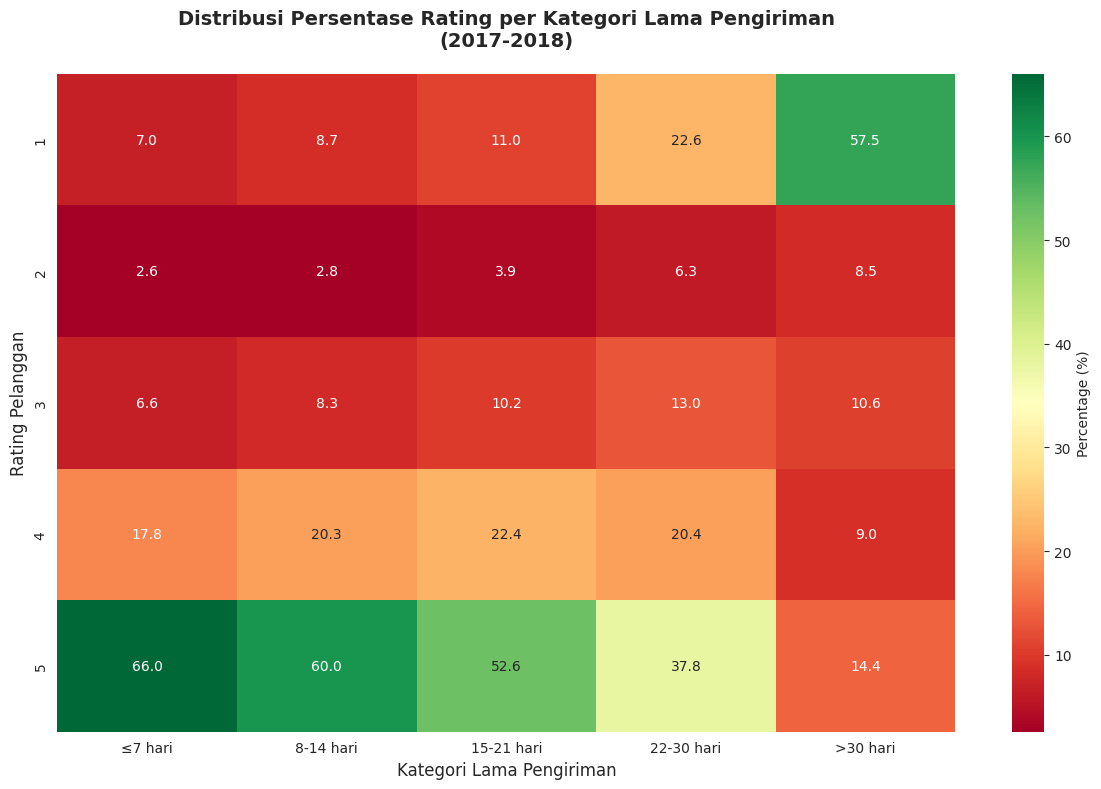

In [28]:
# Visualisasi 4: Heatmap - Distribusi Rating vs Lama Pengiriman
plt.figure(figsize=(12, 8))

# Buat crosstab
crosstab = pd.crosstab(df_delivery['review_score'],
                       df_delivery['delivery_category'],
                       normalize='columns') * 100

# Heatmap
sns.heatmap(crosstab, annot=True, fmt='.1f', cmap='RdYlGn', cbar_kws={'label': 'Percentage (%)'})
plt.title('Distribusi Persentase Rating per Kategori Lama Pengiriman\n(2017-2018)',
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Kategori Lama Pengiriman', fontsize=12)
plt.ylabel('Rating Pelanggan', fontsize=12)
plt.tight_layout()
plt.show()

In [29]:
# Statistical Test: ANOVA atau Kruskal-Wallis Test
print("UJI STATISTIK: PERBEDAAN RATING ANTAR KATEGORI PENGIRIMAN")

# Siapkan data untuk setiap kategori
groups = []
for category in df_delivery['delivery_category'].unique():
    groups.append(df_delivery[df_delivery['delivery_category'] == category]['review_score'].values)

# Kruskal-Wallis Test (non-parametric alternative to ANOVA)
from scipy.stats import kruskal
statistic, p_value = kruskal(*groups)

print(f"\nKruskal-Wallis Test:")
print(f"H-statistic: {statistic:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("\nKesimpulan: Terdapat perbedaan yang signifikan secara statistik")
    print("antara rating pelanggan pada berbagai kategori lama pengiriman (p < 0.05)")
else:
    print("\nKesimpulan: Tidak terdapat perbedaan yang signifikan secara statistik")
    print("antara rating pelanggan pada berbagai kategori lama pengiriman (p >= 0.05)")

UJI STATISTIK: PERBEDAAN RATING ANTAR KATEGORI PENGIRIMAN

Kruskal-Wallis Test:
H-statistic: 9547.6173
P-value: 0.000000

Kesimpulan: Terdapat perbedaan yang signifikan secara statistik
antara rating pelanggan pada berbagai kategori lama pengiriman (p < 0.05)


**Insight:**
- Analisis menunjukkan bahwa sebagian besar revenue e-commerce berasal dari sebagian kecil kategori produk, mencerminkan pola Pareto. Di sisi lain, kepuasan pelanggan sangat dipengaruhi oleh lama pengiriman, dengan penurunan rating yang signifikan ketika pengiriman melebihi 21 hari. Hal ini menegaskan bahwa optimasi logistik pada kategori berkontribusi tinggi terhadap revenue merupakan faktor kunci dalam menjaga performa bisnis dan pengalaman pelanggan.

## Conclusion

### Kesimpulan Pertanyaan 1: Distribusi Kontribusi Pendapatan per Kategori Produk (2017-2018)

**Temuan Utama:**

1. **Kategori Dominan:**
   - Berdasarkan analisis revenue periode 2017-2018, ditemukan bahwa **cama_mesa_banho (Kebutuhan Rumah Tangga)** merupakan kategori yang mendominasi dengan total revenue sebesar **R$ 1723173.96**, berkontribusi **8.67%** dari total revenue keseluruhan.
   - Top 3 kategori produk (cama_mesa_banho,beleza_saude,informatica_acessorios) secara kolektif menyumbang **24.94%** dari total revenue, menunjukkan konsentrasi yang cukup signifikan pada beberapa kategori tertentu.

2. **Distribusi Revenue:**
   - Terdapat **16** kategori produk yang aktif dalam periode 2017-2018.
   - Mengikuti prinsip Pareto (80/20), ditemukan bahwa **16 dari 71 kategori** (sekitar **22.54%** dari total kategori) berkontribusi terhadap **80%** dari total revenue.
   - Hal ini menunjukkan distribusi revenue yang tidak merata, di mana sebagian kecil kategori mendominasi pendapatan platform.

3. **Karakteristik Kategori Top:**
   - Kategori dengan revenue tertinggi tidak selalu memiliki jumlah transaksi terbanyak, menunjukkan bahwa nilai transaksi rata-rata (average order value) juga berperan penting.
   - Kategori **moveis_escritorio** memiliki average revenue per transaksi tertinggi sebesar **R$ 364.595283**, meskipun jumlah transaksinya **lebih rendah** dibanding kategori lain.

**Alasan/Insight:**
- Dominasi beberapa kategori tertentu kemungkinan disebabkan oleh: (1) tingginya permintaan konsumen pada kategori tersebut, (2) harga produk yang lebih tinggi pada kategori premium, atau (3) strategi pemasaran yang lebih efektif.
- Kategori dengan kontribusi rendah mungkin menghadapi: (1) persaingan yang ketat, (2) margin keuntungan yang kecil, atau (3) kurangnya awareness konsumen.

---

### Rekomendasi Pertanyaan 1:

1. **Fokus pada Kategori Unggulan:**
   - Tingkatkan inventory dan variasi produk pada top 5-10 kategori yang berkontribusi signifikan terhadap revenue.
   - Alokasikan budget marketing yang lebih besar untuk kategori-kategori dominan ini untuk mempertahankan dan meningkatkan market share.

2. **Optimasi Kategori Underperforming:**
   - Lakukan analisis mendalam terhadap kategori dengan revenue rendah untuk mengidentifikasi apakah perlu: (a) peningkatan strategi pemasaran, (b) perbaikan katalog produk, atau (c) evaluasi untuk menghentikan kategori yang tidak profitable.
   - Pertimbangkan cross-selling antara kategori populer dengan kategori yang kurang diminati untuk meningkatkan exposure.

3. **Diversifikasi Portofolio:**
   - Meskipun fokus pada kategori unggulan penting, platform perlu mempertahankan diversifikasi untuk mengurangi risiko ketergantungan pada beberapa kategori saja.
   - Identifikasi kategori-kategori emerging yang menunjukkan tren pertumbuhan positif untuk investasi jangka panjang.

4. **Strategi Pricing & Promosi:**
   - Implementasikan dynamic pricing pada kategori high-value untuk maksimalkan revenue.
   - Buat bundling atau promosi khusus yang menggabungkan produk dari kategori populer dengan kategori yang kurang populer.

5. **Personalisasi Rekomendasi:**
   - Gunakan data kategori dominan untuk meningkatkan akurasi sistem rekomendasi produk kepada pelanggan.
   - Personalisasi homepage dan email marketing berdasarkan preferensi kategori pelanggan.

---

### Kesimpulan Pertanyaan 2: Hubungan Lama Pengiriman dengan Rating Pelanggan (2017-2018)

**Temuan Utama:**

1. **Korelasi Negatif yang Signifikan:**
   - Analisis menunjukkan korelasi negatif sebesar **-0.3192** antara lama pengiriman dengan rating pelanggan.
   - Semakin lama waktu pengiriman, semakin rendah rating yang diberikan pelanggan, meskipun hubungan korelasi negatifnya **Cukup Kuat**.

2. **Perbedaan Rating Antar Kategori Pengiriman:**
   - Pengiriman **≤7 hari**: Average rating **4.33** (kategori tercepat, rating tertinggi)
   - Pengiriman **8-14 hari**: Average rating **4.20*
   - Pengiriman **15-21 hari**: Average rating **4.02**
   - Pengiriman **22-30 hari**: Average rating **3.44**
   - Pengiriman **>30 hari**: Average rating **2.14** (kategori terlama, rating terendah)
   
   Penurunan rating dari pengiriman tercepat ke terlambat adalah sebesar **2.19 poin**, atau sekitar **50.6%**.

3. **Signifikansi Statistik:**
   - Uji Kruskal-Wallis menghasilkan p-value = **0.000000** (< 0.05), yang berarti perbedaan rating antar kategori pengiriman adalah **signifikan secara statistik**.
   - Ini mengkonfirmasi bahwa lama pengiriman memang berpengaruh nyata terhadap kepuasan pelanggan.

4. **Distribusi Pengiriman:**
   - Mayoritas pengiriman **89%** diselesaikan dalam **<21 hari**.
   - Namun masih terdapat **4%** pengiriman yang memakan waktu lebih dari 30 hari, yang secara konsisten mendapat rating rendah.

**Alasan/Insight:**
- Pelanggan e-commerce memiliki ekspektasi tinggi terhadap kecepatan pengiriman, terutama di era modern.
- Keterlambatan pengiriman menciptakan ketidakpuasan yang langsung terefleksi pada rating, terlepas dari kualitas produk.
- Pengiriman cepat (≤7 hari) menjadi faktor kunci dalam mempertahankan rating tinggi dan customer satisfaction.

---

### Rekomendasi Pertanyaan 2:

1. **Optimasi Logistik dan Delivery Network:**
   - Prioritaskan perbaikan infrastruktur logistik untuk mengurangi waktu pengiriman, terutama untuk daerah-daerah dengan delivery time yang panjang.
   - Pertimbangkan kerjasama dengan lebih banyak partner logistik atau membuka fulfillment center di lokasi strategis untuk mempercepat pengiriman.
   - Target: Meningkatkan persentase pengiriman yang selesai dalam ≤7 hari dari **35,15%** menjadi **45%**.

2. **Transparansi Estimasi Pengiriman:**
   - Berikan estimasi waktu pengiriman yang akurat dan realistis pada saat checkout.
   - Implementasikan real-time tracking yang mudah diakses pelanggan untuk mengurangi kecemasan selama periode pengiriman.
   - Kirim notifikasi proaktif mengenai status pengiriman (sedang diproses, dalam perjalanan, tiba hari ini).

3. **Insentif untuk Pengiriman Cepat:**
   - Tawarkan opsi express delivery dengan biaya tambahan untuk pelanggan yang menginginkan pengiriman lebih cepat.
   - Buat program loyalty atau free express shipping untuk pelanggan premium/frequent buyers.

4. **Kompensasi untuk Keterlambatan:**
   - Implementasikan kebijakan kompensasi (diskon, voucher) untuk pengiriman yang terlambat dari estimasi awal.
   - Proaktif menghubungi pelanggan yang mengalami keterlambatan untuk memberikan update dan solusi.

5. **Segmentasi Berdasarkan Urgency:**
   - Identifikasi kategori produk yang time-sensitive dan prioritaskan pengiriman cepat untuk kategori tersebut.
   - Untuk produk yang tidak urgent, komunikasikan dengan jelas bahwa pengiriman mungkin memakan waktu lebih lama dengan harga yang lebih kompetitif.

6. **Monitoring dan KPI:**
   - Tetapkan KPI delivery time sebagai salah satu metrik utama operasional.
   - Monitor secara berkala korelasi antara delivery performance dengan customer satisfaction score.
   - Lakukan root cause analysis untuk pengiriman yang terlambat dan implementasikan continuous improvement.

7. **Manajemen Ekspektasi:**
   - Edukasi pelanggan mengenai faktor-faktor yang dapat mempengaruhi waktu pengiriman (jarak, cuaca, peak season).
   - Berikan opsi pengiriman dengan berbagai kecepatan dan harga agar pelanggan dapat memilih sesuai kebutuhan.

---

**Catatan Akhir:**
Kedua pertanyaan bisnis menunjukkan area-area kritis yang perlu mendapat perhatian khusus dari manajemen. Fokus pada kategori produk unggulan dan perbaikan delivery experience akan memberikan dampak signifikan terhadap revenue dan customer satisfaction platform e-commerce secara keseluruhan.


---
**END OF ANALYSIS**

In [30]:
df.to_csv("main_data.csv", index=False)